In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading covid_19 dataset
covid = pd.read_csv("/content/drive/MyDrive/ML_Classification_Model/Covid_19_Outbreak_Prediction/covid_19_india.csv", parse_dates= ['Date'], dayfirst= True)

In [ ]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
#shape of dataset
covid.shape

(14402, 9)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14402 entries, 0 to 14401
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       14402 non-null  int64         
 1   Date                      14402 non-null  datetime64[ns]
 2   Time                      14402 non-null  object        
 3   State/UnionTerritory      14402 non-null  object        
 4   ConfirmedIndianNational   14402 non-null  object        
 5   ConfirmedForeignNational  14402 non-null  object        
 6   Cured                     14402 non-null  int64         
 7   Deaths                    14402 non-null  int64         
 8   Confirmed                 14402 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1012.8+ KB


In [ ]:
#statistical summary of dataset
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,14402.000000,1.440200e+04,14402.000000,1.440200e+04
mean,7201.500000,1.584072e+05,2525.111790,1.738016e+05
std,4157.643623,3.210715e+05,6723.661773,3.533578e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3601.250000,1.342000e+03,11.000000,2.498250e+03
50%,7201.500000,1.683550e+04,332.000000,2.204450e+04
75%,10801.750000,1.870605e+05,1936.000000,2.120525e+05
max,14402.000000,3.799266e+06,67985.000000,4.539553e+06


In [ ]:
#Checking missing values in dataset
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

* There are no missing values present in dataset.

In [ ]:
#columns of dataset
covid.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [ ]:
#We drop columns which is not required for our model.
covid.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'],axis= 1, inplace= True) 

In [ ]:
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
#Renaming columns labels
covid.rename(columns={"Date": 'date', 'State/UnionTerritory': 'state', 'Cured': 'cured', 'Deaths': 'deaths', 'Confirmed':'confirmed'},inplace = True)

In [ ]:
covid.head(10)

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [ ]:
covid.tail()

,date,state,cured,deaths,confirmed
14397,2021-04-30,Telangana,355618,2261,435606
14398,2021-04-30,Tripura,33612,396,35169
14399,2021-04-30,Uttarakhand,124046,2502,174867
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952
14401,2021-04-30,West Bengal,689466,11248,810955


In [ ]:
today = covid[covid.date == '2021-04-30']

In [ ]:
today.head(30)

,date,state,cured,deaths,confirmed
14366,2021-04-30,Andaman and Nicobar Islands,5643,67,5875
14367,2021-04-30,Andhra Pradesh,962250,7928,1084336
14368,2021-04-30,Arunachal Pradesh,17085,59,18256
14369,2021-04-30,Assam,224194,1281,249926
14370,2021-04-30,Bihar,351162,2480,454464
14371,2021-04-30,Chandigarh,34806,465,41923
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14373,2021-04-30,Dadra and Nagar Haveli and Daman and Diu,5249,4,7334
14374,2021-04-30,Delhi,1008537,15772,1122286
14375,2021-04-30,Goa,65984,1146,88028


In [ ]:
#Let's total number of records in today dataset
today.shape

(36, 5)

In [ ]:
#Now sorting dataset w.r.t. confirmed cases
max_confirmed_cases = today.sort_values(by = 'confirmed', ascending= False)

In [ ]:
max_confirmed_cases

,date,state,cured,deaths,confirmed
14386,2021-04-30,Maharashtra,3799266,67985,4539553
14382,2021-04-30,Kerala,1244301,5259,1533984
14381,2021-04-30,Karnataka,1110025,15306,1474846
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952
14396,2021-04-30,Tamil Nadu,1021575,13933,1148064
14374,2021-04-30,Delhi,1008537,15772,1122286
14367,2021-04-30,Andhra Pradesh,962250,7928,1084336
14401,2021-04-30,West Bengal,689466,11248,810955
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14394,2021-04-30,Rajasthan,407243,4084,580846


In [ ]:
top_states_confirmed = max_confirmed_cases[0:5]

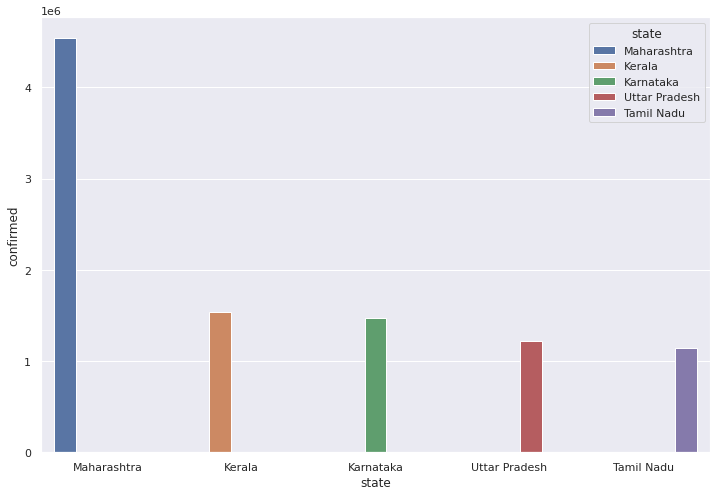

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})
sns.barplot(x = 'state', y = 'confirmed', data = top_states_confirmed, hue = 'state')
plt.show()

In [ ]:
#Now sorting dataset w.r.t. death cases
max_death_cases = today.sort_values(by = 'deaths', ascending= False)

In [ ]:
max_death_cases

,date,state,cured,deaths,confirmed
14386,2021-04-30,Maharashtra,3799266,67985,4539553
14374,2021-04-30,Delhi,1008537,15772,1122286
14381,2021-04-30,Karnataka,1110025,15306,1474846
14396,2021-04-30,Tamil Nadu,1021575,13933,1148064
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952
14401,2021-04-30,West Bengal,689466,11248,810955
14393,2021-04-30,Punjab,301047,8909,364910
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14367,2021-04-30,Andhra Pradesh,962250,7928,1084336
14376,2021-04-30,Gujarat,408368,7010,553172


In [ ]:
top_states_deaths = max_death_cases[0:5]

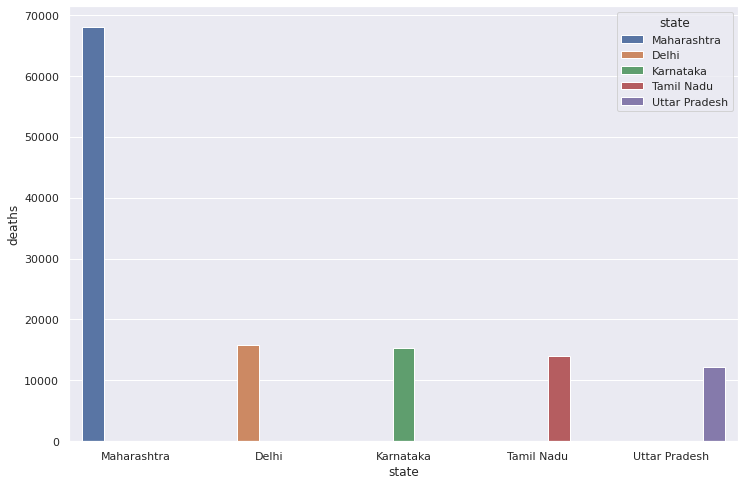

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})
sns.barplot(x = 'state', y = 'deaths', data = top_states_deaths, hue = 'state')
plt.show()

In [ ]:
max_cured_cases = today.sort_values(by = 'cured', ascending= False)

In [ ]:
max_cured_cases

,date,state,cured,deaths,confirmed
14386,2021-04-30,Maharashtra,3799266,67985,4539553
14382,2021-04-30,Kerala,1244301,5259,1533984
14381,2021-04-30,Karnataka,1110025,15306,1474846
14396,2021-04-30,Tamil Nadu,1021575,13933,1148064
14374,2021-04-30,Delhi,1008537,15772,1122286
14367,2021-04-30,Andhra Pradesh,962250,7928,1084336
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952
14401,2021-04-30,West Bengal,689466,11248,810955
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14385,2021-04-30,Madhya Pradesh,453331,5519,550927


In [ ]:
top_cured_cases = max_cured_cases[0:5]

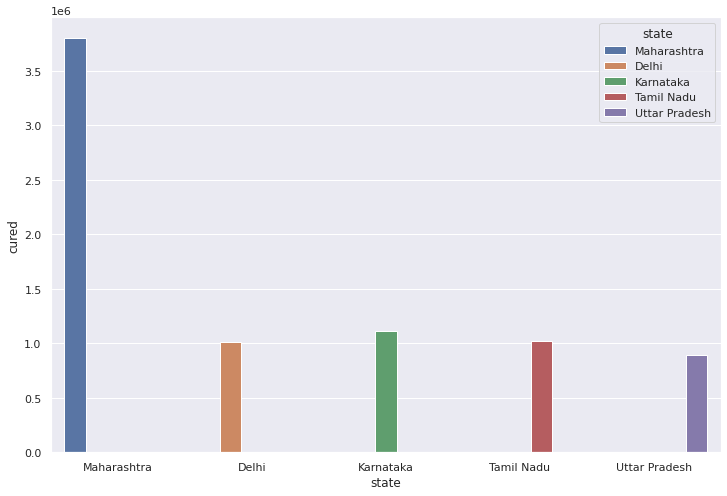

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})
sns.barplot(x = 'state', y = 'cured', data = top_states_deaths, hue = 'state')
plt.show()

In [ ]:
#Now we analyze the covide cases by state wise.
## Maharashtra
maha = covid[covid.state == 'Maharashtra']

In [ ]:
maha.head(10)

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
146,2020-03-14,Maharashtra,0,0,14
153,2020-03-15,Maharashtra,0,0,32
167,2020-03-16,Maharashtra,0,0,32
182,2020-03-17,Maharashtra,0,1,39
197,2020-03-18,Maharashtra,0,1,42


In [ ]:
maha.tail(10)

,date,state,cured,deaths,confirmed
14062,2021-04-21,Maharashtra,3213464,61343,3960359
14098,2021-04-22,Maharashtra,3268449,61911,4027827
14134,2021-04-23,Maharashtra,3330747,62479,4094840
14170,2021-04-24,Maharashtra,3404792,63252,4161676
14206,2021-04-25,Maharashtra,3468610,63928,4228836
14242,2021-04-26,Maharashtra,3530060,64760,4295027
14278,2021-04-27,Maharashtra,3601796,65284,4343727
14314,2021-04-28,Maharashtra,3669548,66179,4410085
14350,2021-04-29,Maharashtra,3730729,67214,4473394
14386,2021-04-30,Maharashtra,3799266,67985,4539553


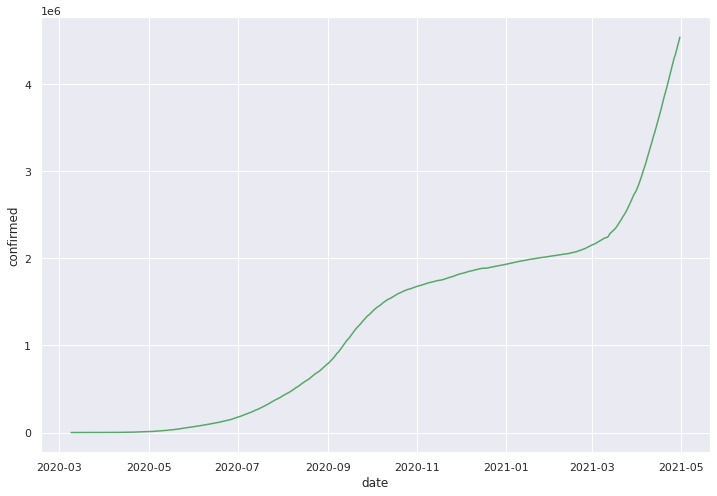

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'date', y = 'confirmed', data = maha, color = 'g')
plt.show()

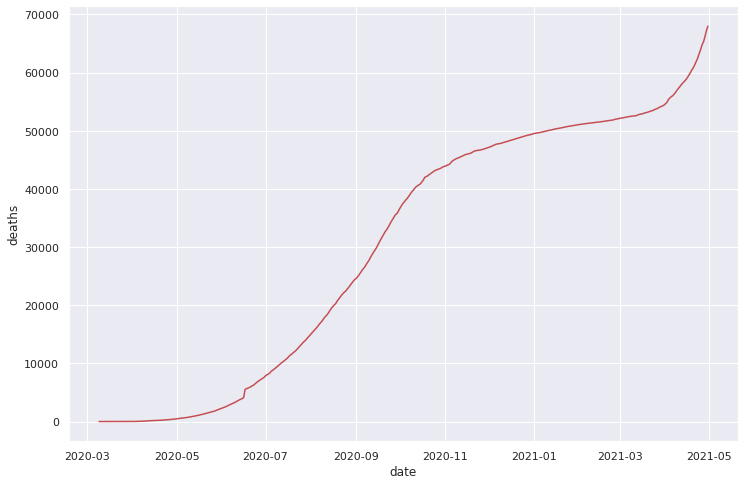

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'date', y = 'deaths', data = maha, color = 'r')
plt.show()

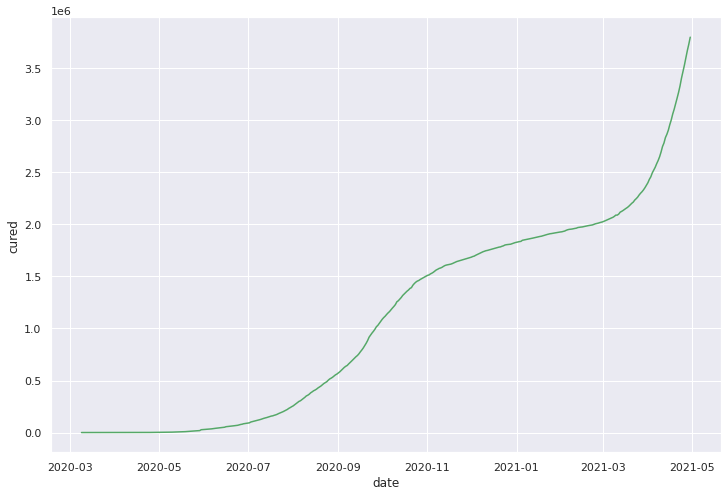

In [ ]:
 sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'date', y = 'cured', data = maha, color = 'g')
plt.show()

In [ ]:
## Kerala

kerala = covid[covid.state == 'Kerala']

In [ ]:
kerala.head(10)

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [ ]:
kerala.tail(10)

,date,state,cured,deaths,confirmed
14058,2021-04-21,Kerala,1148671,4978,1272645
14094,2021-04-22,Kerala,1154102,5000,1295059
14130,2021-04-23,Kerala,1160472,5028,1322054
14166,2021-04-24,Kerala,1166135,5055,1350501
14202,2021-04-25,Kerala,1173202,5080,1377186
14238,2021-04-26,Kerala,1181324,5110,1405655
14274,2021-04-27,Kerala,1189267,5138,1427545
14310,2021-04-28,Kerala,1207680,5170,1460364
14346,2021-04-29,Kerala,1223185,5211,1495377
14382,2021-04-30,Kerala,1244301,5259,1533984


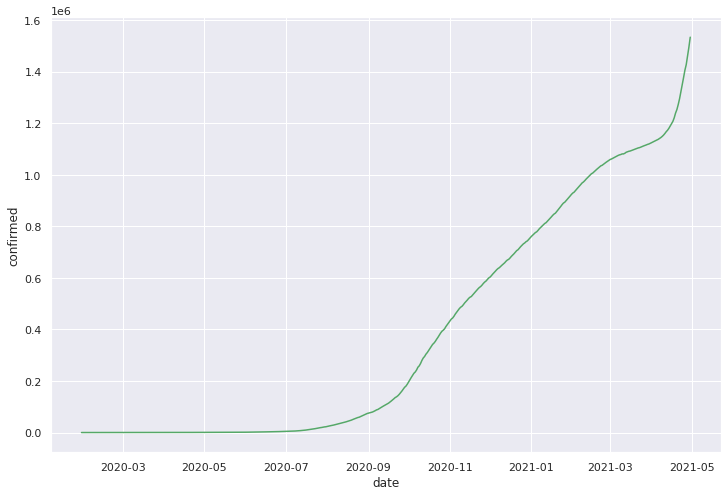

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'date', y = 'confirmed', data = kerala, color = 'g')
plt.show()

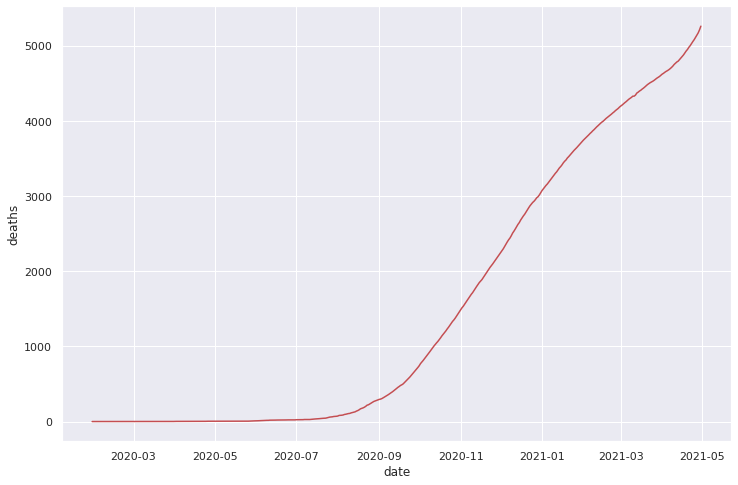

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'date', y = 'deaths', data = kerala, color = 'r')
plt.show()

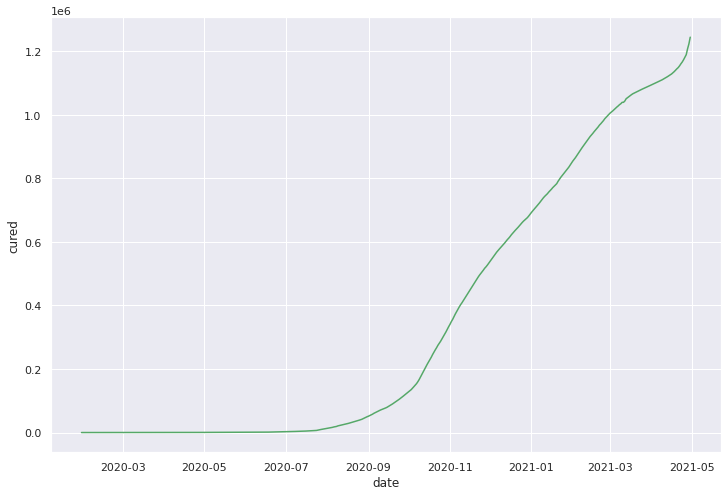

In [ ]:
 sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'date', y = 'cured', data = kerala, color = 'g')
plt.show()

In [ ]:
#Testing Details Statewise
tests = pd.read_csv("/content/drive/MyDrive/ML_Classification_Model/Covid_19_Outbreak_Prediction/StatewiseTestingDetails.csv")

In [ ]:
tests.head(10)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,NaN,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,NaN,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,NaN,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,NaN,33.0


In [ ]:
tests.tail(10)

,Date,State,TotalSamples,Negative,Positive
12735,2021-04-20,West Bengal,9900322.0,NaN,NaN
12736,2021-04-21,West Bengal,9950336.0,NaN,NaN
12737,2021-04-22,West Bengal,10003490.0,NaN,NaN
12738,2021-04-23,West Bengal,10056136.0,NaN,NaN
12739,2021-04-24,West Bengal,10111196.0,NaN,NaN
12740,2021-04-25,West Bengal,10166796.0,NaN,NaN
12741,2021-04-26,West Bengal,10215358.0,NaN,NaN
12742,2021-04-27,West Bengal,10270645.0,NaN,NaN
12743,2021-04-28,West Bengal,10325581.0,NaN,NaN
12744,2021-04-29,West Bengal,10379305.0,NaN,NaN


In [ ]:
tests.shape

(12745, 5)

In [ ]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12745 entries, 0 to 12744
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          12745 non-null  object 
 1   State         12745 non-null  object 
 2   TotalSamples  12745 non-null  float64
 3   Negative      5904 non-null   object 
 4   Positive      5387 non-null   float64
dtypes: float64(2), object(3)
memory usage: 498.0+ KB


* Predict the Confirmed cases based on the Date

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
maha.shape

(418, 5)

In [ ]:
maha.head()

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [ ]:
maha['date'] = maha['date'].map(dt.datetime.toordinal)

In [ ]:
maha.head() 

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [ ]:
maha.tail()

,date,state,cured,deaths,confirmed
14242,737906,Maharashtra,3530060,64760,4295027
14278,737907,Maharashtra,3601796,65284,4343727
14314,737908,Maharashtra,3669548,66179,4410085
14350,737909,Maharashtra,3730729,67214,4473394
14386,737910,Maharashtra,3799266,67985,4539553


In [ ]:
#Now splitting dataset into independent variable and dependent variable
X = maha['date']
y = maha['confirmed']

In [ ]:
X.head()

76     737493
91     737494
97     737495
120    737496
133    737497
Name: date, dtype: int64

In [ ]:
y.head()

76      2
91      5
97      2
120    11
133    14
Name: confirmed, dtype: int64

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Rando Forest Regressor
forest = RandomForestRegressor()
forest.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
forest_prediction = forest.predict(np.array(x_test).reshape(-1,1))

In [ ]:
#Decision Tree Regressor
dtree = DecisionTreeRegressor()
dtree.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
dtree_prediction = dtree.predict(np.array(x_test).reshape(-1,1))

In [ ]:
#KNN Regressor 
knn = KNeighborsRegressor()
knn.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
knn_prediction = knn.predict(np.array(x_test).reshape(-1,1))

In [ ]:
#Let's check the performance of the model
from sklearn.metrics import mean_squared_error, r2_score
print("Decision Tree Regressor : ")
print("Rsquared score : ", r2_score(y_test, dtree_prediction))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, dtree_prediction)))
print("==="*20)

print("Random Forest Regressor : ")
print("Rsquared score : ", r2_score(y_test, forest_prediction))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, forest_prediction)))
print("==="*20)

print("KNN Regressor : ")
print("Rsquared score : ", r2_score(y_test, knn_prediction))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, knn_prediction)))
print("==="*20)


Decision Tree Regressor : 
Rsquared score :  0.9997540239399912
RMSE :  16841.14828506429
Random Forest Regressor : 
Rsquared score :  0.9998199464643136
RMSE :  14408.74337198641
KNN Regressor : 
Rsquared score :  0.999555988510684
RMSE :  22626.76068357788


* We can see that Randomforest regressor model gives less RMSE.

In [ ]:
#Let's predict the model on new data
forest.predict([[737911]])

array([4443110.23])

In [ ]:
maha.head()

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [ ]:
maha.columns

Index(['date', 'state', 'cured', 'deaths', 'confirmed'], dtype='object')

In [ ]:
X_data = maha[['date', 'cured', 'deaths']] 
y_data = maha['confirmed']

In [ ]:
X_data.head()

,date,cured,deaths
76,737493,0,0
91,737494,0,0
97,737495,0,0
120,737496,0,0
133,737497,0,0


In [ ]:
X_data.tail()

,date,cured,deaths
14242,737906,3530060,64760
14278,737907,3601796,65284
14314,737908,3669548,66179
14350,737909,3730729,67214
14386,737910,3799266,67985


In [ ]:
y_data.tail()

14242    4295027
14278    4343727
14314    4410085
14350    4473394
14386    4539553
Name: confirmed, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_data,y_data, test_size = 0.2, random_state = 0)

In [ ]:
#Rando Forest Regressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
rf_prediction = rf.predict(xtest)

In [ ]:
#Decision Tree Regressor
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(xtrain, ytrain)
dtree_reg_prediction = dtree_reg.predict(xtest)

In [ ]:
print("Decision Tree Regressor : ")
print("Rsquared score : ", r2_score(ytest, dtree_reg_prediction))
print("RMSE : ", np.sqrt(mean_squared_error(ytest, dtree_reg_prediction)))
print("==="*20)

print("Random Forest Regressor : ")
print("Rsquared score : ", r2_score(ytest, rf_prediction))
print("RMSE : ", np.sqrt(mean_squared_error(ytest, rf_prediction)))
print("==="*20)


Decision Tree Regressor : 
Rsquared score :  0.9997494374979257
RMSE :  16997.432218888658
Random Forest Regressor : 
Rsquared score :  0.9998332312863705
RMSE :  13867.00170105194


In [ ]:
#PRedict on new data
rf.predict([[737911, 3799500,67995]])

array([4430552.98])